# EXAMEN FINAL IA 
### * Nombre: Diego Santiago Solorzano Arancibia
### * Carrera: Ing. en Ciencias de la Computación
### * Enlace GIT: https://github.com/DiegoSolorzano9/Inteligencia-Artificial-I-2-2024/tree/4ec8eaf56cc7bf0f4469831f19ecbd79a8b3ff19/Examen%20Final

## 1. Creación de dataset de fichas médicas
Este código simula la generación de registros médicos para pacientes y doctores en un hospital. Crea datos aleatorios de pacientes, asignándoles CIs, nombres, apellidos, carnets y especialidades médicas. Las especialidades se asignan a los pacientes según una distribución de probabilidad definida, y se tiene en cuenta la edad y la condición crónica del paciente para ajustar el número de visitas a las consultas. También se generan doctores con especialidades y turnos de trabajo aleatorios, y se asignan citas médicas a los pacientes, con fechas y horas que cumplen con las disponibilidades de los doctores. Finalmente, se guarda toda esta información en un archivo CSV con detalles como el CI del paciente, nombre del doctor, fecha y hora de la cita, especialidad, entre otros.

In [ ]:
import random
import string
from datetime import datetime, timedelta
import csv
from collections import defaultdict

# Listas para nombres y apellidos
nombres_hombre = [
    "Carlos", "Juan", "Luis", "Miguel", "Pedro", "Jorge", "Andrés", "Eduardo", "Diego", "Sebastián",
    "Alejandro", "Fernando", "Ricardo", "Hugo", "Gabriel", "Raúl", "David", "Santiago", "Iván", "Adrián",
    "Pablo", "Martín", "Tomás", "Álvaro", "Victor", "Emilio", "José", "Francisco", "Rafael", "Antonio"
]

nombres_mujer = [
    "María", "Ana", "Luisa", "Gabriela", "Claudia", "Carla", "Isabel", "Fernanda", "Laura", "Sofía",
    "Paula", "Camila", "Valeria", "Julia", "Diana", "Elena", "Patricia", "Verónica", "Carmen", "Alicia",
    "Marta", "Raquel", "Carolina", "Beatriz", "Sandra", "Esther", "Irene", "Nuria", "Montserrat", "Silvia"
]

apellidos = [
    "González", "Pérez", "Rodríguez", "López", "Martínez", "García", "Hernández", "Sánchez", "Ramírez", "Fernández",
    "Díaz", "Vázquez", "Moreno", "Jiménez", "Mendoza", "Gómez", "Alvarez", "Ruiz", "Torres", "Ríos"
]

# Especialidades médicas con distribución más realista
especialidades = {
    "Medicina Interna": {
        "min_doctores": 12, # Mínimo de doctores por especialidad interna
        "max_doctores": 15, # Máximo de doctores por especialidad interna
        "peso": 0.25,  # 25% de las consultas
        "prob_urgencia": 0.4 # 40% de las consultas son urgentes
    },
    "Cirugía General": {
        "min_doctores": 8, # Mínimo de doctores por especialidad general
        "max_doctores": 12, # Máximo de doctores por especialidad general
        "peso": 0.15,  # 15% de las consultas 
        "prob_urgencia": 0.3 # 30% de las consultas son urgentes
    },
    "Pediatría": {
        "min_doctores": 10, # Mínimo de doctores por especialidad pediátrica
        "max_doctores": 14, # Máximo de doctores por especialidad pediátrica
        "peso": 0.15,  # 15% de las consultas
        "prob_urgencia": 0.35 # 35% de las consultas son urgentes
    },
    "Cardiología": {
        "min_doctores": 6, # Mínimo de doctores por especialidad cardiológica
        "max_doctores": 8, # Máximo de doctores por especialidad cardiológica
        "peso": 0.12,  # 12% de las consultas
        "prob_urgencia": 0.25 # 25% de las consultas son urgentes
    },
    "Traumatología": {
        "min_doctores": 6, # Mínimo de doctores por especialidad traumatológica
        "max_doctores": 8, # Máximo de doctores por especialidad traumatológica
        "peso": 0.10,  # 10% de las consultas
        "prob_urgencia": 0.3 # 30% de las consultas son urgentes
    },
    "Ginecología": {
        "min_doctores": 5, # Mínimo de doctores por especialidad ginecológica
        "max_doctores": 7, # Máximo de doctores por especialidad ginecológica
        "peso": 0.08,  # 8% de las consultas
        "prob_urgencia": 0.2 # 20% de las consultas son urgentes
    },
    "Neurología": {
        "min_doctores": 4, # Mínimo de doctores por especialidad neurológica
        "max_doctores": 6, # Máximo de doctores por especialidad neurológica
        "peso": 0.06,  # 6% de las consultas
        "prob_urgencia": 0.15 # 15% de las consultas son urgentes
    },
    "Oncología": {
        "min_doctores": 4, # Mínimo de doctores por especialidad oncológica
        "max_doctores": 6, # Máximo de doctores por especialidad oncológica
        "peso": 0.04,  # 4% de las consultas
        "prob_urgencia": 0.1 # 10% de las consultas son urgentes
    },
    "Dermatología": {
        "min_doctores": 3, # Mínimo de doctores por especialidad dermatológica
        "max_doctores": 4, # Máximo de doctores por especialidad dermatológica
        "peso": 0.03,  # 3% de las consultas
        "prob_urgencia": 0.05 # 5% de las consultas son urgentes
    },
    "Oftalmología": {
        "min_doctores": 3, # Mínimo de doctores por especialidad oftalmológica
        "max_doctores": 4, # Máximo de doctores por especialidad oftalmológica
        "peso": 0.02,  # 2% de las consultas
        "prob_urgencia": 0.05 # 5% de las consultas son urgentes
    }
}

# Funciones para generar CI únicos
def generar_ci_unico(cis_existentes): 
    while True:
        ci = ''.join(random.choices(string.digits, k=8)) # CI de 8 dígitos
        if ci not in cis_existentes: # Verificar si el CI no existe
            return ci # Devolver CI único

# Función para generar carnet único
def generar_carnet_unico(carnets_existentes):
    while True:
        carnet = f"{''.join(random.choices(string.digits, k=5))}-{''.join(random.choices(string.ascii_uppercase, k=3))}" # Carnet de 5 dígitos y 3 letras
        if carnet not in carnets_existentes: # Verificar si el carnet no existe
            return carnet # Devolver carnet único

# Clase para pacientes
class Paciente:
    def __init__(self, ci, nombre, apellidos, carnet): # constructor de la clase
        self.ci = ci # CI del paciente
        self.nombre = nombre # Nombre del paciente
        self.apellidos = apellidos # Apellidos del paciente
        self.carnet = carnet # Carnet del paciente
        # Asignar especialidades frecuentes basadas en probabilidades
        self.especialidades_frecuentes = self._asignar_especialidades() # llama a la función _asignar_especialidades
        self.condicion_cronica = random.random() < 0.3  # 30% tienen condición crónica
        self.edad = random.randint(1, 85) # Edad aleatoria entre 1 y 85
        self.es_urgente = random.random() < 0.2  # 20% son casos urgentes

    def _asignar_especialidades(self): # función para asignar especialidades
        # Asignar especialidades basadas en pesos
        esp_asignadas = [] # lista de especialidades asignadas
        for esp, datos in especialidades.items(): # recorre las especialidades
            if random.random() < datos["peso"]: # si el número aleatorio es menor al peso de la especialidad
                esp_asignadas.append(esp) # añadir la especialidad a la lista
        # Asegurar al menos una especialidad
        if not esp_asignadas: # si no hay especialidades asignadas
            esp_asignadas.append(random.choices(     # añadir una especialidad aleatoria
                list(especialidades.keys()),
                weights=[datos["peso"] for datos in especialidades.values()]
            )[0])
        return esp_asignadas

class Doctor: # Clase para doctores
    def __init__(self, nombre, apellido, especialidad): # constructor de la clase Doctor
        self.nombre = nombre # Nombre del doctor
        self.apellido = apellido # Apellido del doctor
        self.especialidad = especialidad # Especialidad del doctor
        self.turno_mañana = random.random() < 0.6 # 60% de los doctores tienen turno de mañana
        self.dias_trabajo = random.sample(range(1, 6), random.randint(3, 5))  # Días laborales aleatorios

# Funciones para generar hora
def generar_hora(doctor, es_urgente=False):
    if es_urgente:
        # Las urgencias pueden ser en cualquier horario
        hora = random.randint(8, 18)
    else:
        if doctor.turno_mañana: # si el doctor tiene turno de mañana
            hora = random.randint(8, 12) # la hora será entre 8 y 12
        else:
            hora = random.randint(14, 18) # la hora será entre 14 y 18
    minutos = random.choice([0, 15, 30, 45]) # minutos aleatorios
    return f"{hora:02d}:{minutos:02d}" # devolver la hora en formato HH:MM

# Función para generar fecha
def generar_fecha(start_date, end_date, doctor):
    while True:
        fecha = start_date + timedelta(days=random.randint(0, (end_date - start_date).days)) # fecha aleatoria entre un rango
        if fecha.weekday() in doctor.dias_trabajo:  # Solo en días laborales del doctor
            return fecha

# Función para generar registros
def generar_registros():
    fecha_inicio = datetime(2014, 1, 1) # fecha de inicio
    fecha_final = datetime(2024, 1, 1) # fecha final
    
    # Conjuntos para mantener registro de CIs y carnets ya utilizados
    cis_utilizados = set()
    carnets_utilizados = set()
    
    # Generar doctores con distribución realista
    doctores_por_especialidad = {}
    for especialidad, datos in especialidades.items(): # recorre las especialidades
        num_doctores = random.randint(datos["min_doctores"], datos["max_doctores"]) # número de doctores aleatorio entre el mínimo y máximo
        doctores = []
        for _ in range(num_doctores): # recorre el número de doctores
            genero = random.choice(['M', 'F']) # género aleatorio
            nombre = random.choice(nombres_hombre if genero == 'M' else nombres_mujer) # nombre aleatorio según el género
            apellido = random.choice(apellidos) # apellido aleatorio
            doctores.append(Doctor(nombre, apellido, especialidad)) # añadir el doctor a la lista de doctores
        doctores_por_especialidad[especialidad] = doctores # añadir la lista de doctores a la especialidad


    # Generar pacientes base con CIs y carnets únicos
    num_pacientes_base = 5000 # número de pacientes
    pacientes = [] # lista de pacientes
    for _ in range(num_pacientes_base): # recorre el número de pacientes
        ci = generar_ci_unico(cis_utilizados) # genera un CI único
        carnet = generar_carnet_unico(carnets_utilizados) # genera un carnet único
        cis_utilizados.add(ci) # añade el CI a la lista de CIs utilizados
        carnets_utilizados.add(carnet) # añade el carnet a la lista de carnets utilizados
        genero = random.choice(['M', 'F']) # género aleatorio del paciente
        nombre = random.choice(nombres_hombre if genero == 'M' else nombres_mujer) # nombre aleatorio según el género del paciente
        apellido = random.choice(apellidos) + " " + random.choice(apellidos) # apellidos aleatorios
        pacientes.append(Paciente(ci, nombre, apellido, carnet)) # añade el paciente a la lista de pacientes


    registros = []
    # Generar consultas manteniendo CI y carnet consistentes
    for paciente in pacientes:
        # Número base de visitas dependiendo de condición crónica y especialidades
        num_visitas_base = random.randint(100, 150) if paciente.condicion_cronica else random.randint(20, 80) # número de visitas base aleatorio según la condición crónica
        
        # Ajustar por edad
        if paciente.edad > 60: # si el paciente es mayor de 60 años
            num_visitas_base = int(num_visitas_base * 1.3)  # 30% más para adultos mayores
        elif paciente.edad < 10: # si el paciente es menor de 10 años
            num_visitas_base = int(num_visitas_base * 1.2)  # 20% más para niños

        for _ in range(num_visitas_base): # recorre el número de visitas base
            # Selección de especialidad basada en pesos y condición del paciente
            if random.random() < 0.7 and paciente.especialidades_frecuentes:  # 70% a especialidades frecuentes
                especialidad = random.choice(paciente.especialidades_frecuentes) # especialidad aleatoria de las frecuentes
            else:
                especialidad = random.choices(              # especialidad aleatoria según los pesos
                    list(especialidades.keys()),
                    weights=[datos["peso"] for datos in especialidades.values()]
                )[0]

            # Determinar si es consulta urgente
            es_urgente = random.random() < especialidades[especialidad]["prob_urgencia"] # si el número aleatorio es menor a la probabilidad de urgencia de la especialidad 
            
            # Seleccionar doctor
            doctor = random.choice(doctores_por_especialidad[especialidad]) # doctor aleatorio de la especialidad 
            
            # Generar fecha y hora
            fecha_ficha = generar_fecha(fecha_inicio, fecha_final, doctor) # fecha aleatoria
            hora_ficha = generar_hora(doctor, es_urgente)  # hora aleatoria

            registro = {
                "CI_Paciente": paciente.ci,  # Mantiene el mismo CI para todas las consultas
                "Nombre_Paciente": paciente.nombre, # Nombre del paciente
                "Apellido_Paciente": paciente.apellidos, # Apellidos del paciente
                "Carnet_Asegurado": paciente.carnet,  # Mantiene el mismo carnet para todas las consultas
                "Nombre_Doctor": doctor.nombre, # Nombre del doctor
                "Apellido_Doctor": doctor.apellido, # Apellido del doctor
                "Identificador_Ficha": f"{''.join(random.choices(string.ascii_uppercase, k=3))}-{''.join(random.choices(string.digits, k=3))}",
                "Fecha_Ficha": fecha_ficha.strftime('%Y-%m-%d'), # Fecha de la consulta
                "Hora_Ficha": hora_ficha, # Hora de la consulta
                "Especialidad": especialidad # Especialidad del doctor que hizo la consulta
            }
            registros.append(registro) # añade el registro a la lista de registros

    # Ordenar registros por fecha y hora
    registros.sort(key=lambda x: (x['Fecha_Ficha'], x['Hora_Ficha'])) 
    return registros

# Generar y guardar registros
registros = generar_registros()

# Guardar en CSV
with open('fichas_hospital.csv', 'w', newline='', encoding='utf-8') as csvfile:
    fieldnames = [
        'CI_Paciente', 'Nombre_Paciente', 'Apellido_Paciente', 'Carnet_Asegurado',
        'Nombre_Doctor', 'Apellido_Doctor', 'Identificador_Ficha', 'Fecha_Ficha',
        'Hora_Ficha', 'Especialidad'
    ] 
    
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    writer.writerows(registros)

print("Archivo CSV generado con éxito.")

Archivo CSV generado con éxito.


## 2. Verificamos la consistencia del dataset
La función verificar_consistencia revisa la validez de los datos en un archivo CSV de registros hospitalarios. Verifica varios aspectos
* que el CI de cada paciente tenga exactamente 8 dígitos; 
* que los CIs sean únicos, es decir, no se repitan para diferentes pacientes; 
* que la fecha de cada ficha esté dentro de los últimos 10 años (2014-2024); 
* que cada paciente tenga al menos una visita registrada; 
* que no haya CIs asociados a múltiples pacientes. Los errores encontrados durante las verificaciones se muestran en la consola, y si no hay problemas, se confirma que los registros son consistentes.

In [2]:
from datetime import datetime
import csv
from collections import defaultdict

# Función para verificar la consistencia de los registros
def verificar_consistencia(archivo_csv):
    # Cargar los registros desde el CSV
    with open(archivo_csv, mode='r', encoding='utf-8') as csvfile: # Abrir el archivo CSV
        reader = csv.DictReader(csvfile) # Leer el archivo CSV
        # Variables para las verificaciones
        ci_unicos = set()  # Para verificar que el CI no se repita
        visitas_por_paciente = defaultdict(int)  # Contar visitas por paciente
        errores = []
        pacientes_ids = defaultdict(list)  # Para almacenar CIs y chequear duplicados

        # Obtener la fecha límite para los últimos 10 años
        fecha_limite = datetime(2014, 1, 1)

        # Verificar todos los registros
        for registro in reader:

            # 1. Verificar que el CI tenga 8 dígitos
            ci_paciente = registro['CI_Paciente'] # Obtener el CI del paciente
            if len(ci_paciente) != 8 or not ci_paciente.isdigit(): # Verificar que el CI tenga 8 dígitos
                errores.append(f"Error: El CI del paciente {ci_paciente} no tiene 8 dígitos o no es válido.")
            
            # 2. Verificar que el CI sea único (no se repita para diferentes pacientes)
            if ci_paciente in pacientes_ids: # Verificar si el CI ya existe
                pacientes_ids[ci_paciente].append(registro['Identificador_Ficha'])
            else:
                pacientes_ids[ci_paciente] = [registro['Identificador_Ficha']] 

            # 3. Verificar que la fecha esté dentro de los últimos 10 años (2014-2024)
            fecha_ficha = registro['Fecha_Ficha']
            try:
                fecha_ficha_obj = datetime.strptime(fecha_ficha, '%Y-%m-%d')
                if fecha_ficha_obj < fecha_limite:
                    errores.append(f"Error: La fecha {fecha_ficha} está fuera de los últimos 10 años.")
            except ValueError:
                errores.append(f"Error: La fecha {fecha_ficha} tiene un formato incorrecto.")
            
            # 5. Contar las visitas de cada paciente
            visitas_por_paciente[ci_paciente] += 1
        
        # 6. Verificar que cada paciente tenga más de 5 fichas
        for ci_paciente, visitas in visitas_por_paciente.items():
            if visitas < 1:
                errores.append(f"Error: El paciente {ci_paciente} tiene menos de 1 visitas (tiene {visitas}).")

        # 7. Verificar que el CI no se repita para diferentes pacientes
        for ci_paciente, fichas in pacientes_ids.items():
            if len(fichas) < 1:
                errores.append(f"Error: El CI {ci_paciente} está asociado a múltiples pacientes.")
        
        # Mostrar resultados
        if errores:
            print("Se encontraron los siguientes errores en el dataset:")
            for error in errores:
                print(error)
        else:
            print("Todos los registros son consistentes.")

# Ejecutar la función
verificar_consistencia('fichas_hospital.csv')


Todos los registros son consistentes.


## 3. Aprendizaje no supervisado 

### Importamos Librerias a utilizar

In [3]:
import pandas as pd # sirve para manipular datos
import matplotlib.pyplot as plt # sirve para graficar
from sklearn.cluster import KMeans # sirve para hacer clustering
from sklearn.metrics import silhouette_samples, silhouette_score # sirve para calcular el coeficiente de silueta
import numpy as np # sirve para operaciones matemáticas
from matplotlib.ticker import FixedLocator, FixedFormatter # sirve para personalizar los ejes de las gráficas
import matplotlib as mpl # sirve para personalizar las gráficas
from sklearn.model_selection import train_test_split # sirve para dividir los datos en entrenamiento y prueba
from sklearn.linear_model import LogisticRegression  # type: ignore # sirve para hacer regresión logística
from sklearn.multiclass import OneVsRestClassifier # type: ignore # sirve para hacer clasificación multiclase
from sklearn.metrics import accuracy_score # type: ignore # sirve para calcular la precisión
import random # sirve para generar números aleatorios
from sklearn.ensemble import RandomForestClassifier # type: ignore # sirve para hacer clasificación con Random Forest
from sklearn.preprocessing import StandardScaler

### Cargamos el dataset y contamos las visitas delos pacientes

Este código carga un archivo CSV que contiene registros hospitalarios, luego agrupa los datos por el "CI_Paciente" para contar el número de visitas que cada paciente ha realizado. Después, extrae la columna "Numero_Visitas" para crear una matriz de características X, la cual contiene la frecuencia de atención de cada paciente. Finalmente, imprime las primeras 5 filas de la matriz X para verificar su correcta carga.

In [4]:
# Cargar el archivo CSV
df = pd.read_csv('fichas_hospital.csv')

# Agrupa, cuenta y crea un datafame con la columna 'Numero_Visitas'
df_visitas = df.groupby('CI_Paciente').size().reset_index(name='Numero_Visitas')

# Preparar X con la columna 'Numero_Visitas'
X = df_visitas[['Numero_Visitas']].values

# Verificar la carga de X
print(X[:5])


[[ 46]
 [ 29]
 [133]
 [150]
 [ 68]]


### Graficamos la Frecuencia de Visitas por Paciente

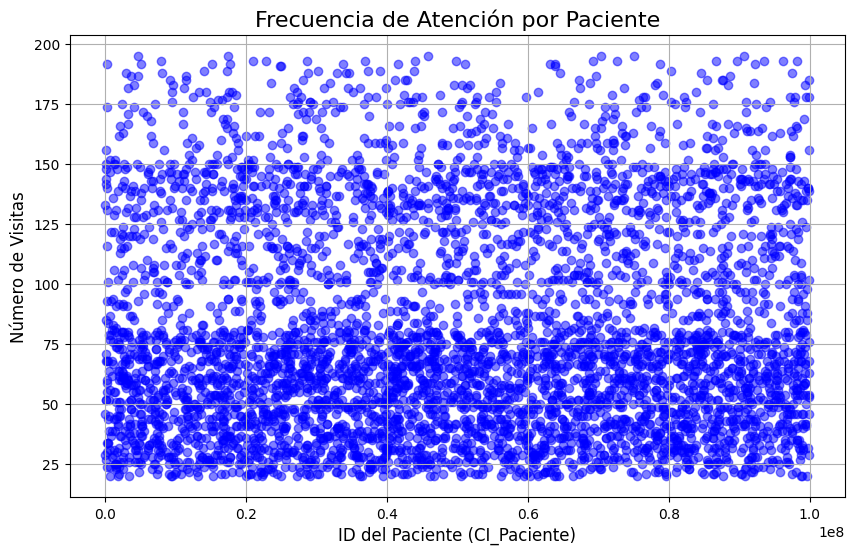

In [5]:
# Graficar los datos en un plano cartesiano
plt.figure(figsize=(10, 6))
plt.scatter(df_visitas['CI_Paciente'], df_visitas['Numero_Visitas'], alpha=0.5, color='blue')
plt.title('Frecuencia de Atención por Paciente', fontsize=16)
plt.xlabel('ID del Paciente (CI_Paciente)', fontsize=12)
plt.ylabel('Número de Visitas', fontsize=12)
plt.grid(True)
plt.show()

### Calcula los modelos y las puntuaciones de silueta para k desde 2 hasta 10

Este código ajusta el algoritmo K-Means a un rango de valores de 
𝑘
k (de 2 a 10) y calcula el índice de silueta para cada número de clusters. El índice de silueta es una métrica que evalúa la calidad de la agrupación, midiendo lo bien que un punto se ajusta a su propio cluster en comparación con otros clusters. Luego, se visualiza este índice en una gráfica, donde el eje X representa el número de clusters (
𝑘
k) y el eje Y muestra el puntaje de silueta correspondiente. Esta gráfica ayuda a identificar el valor de 
𝑘
k que produce la mejor segmentación según esta métrica.

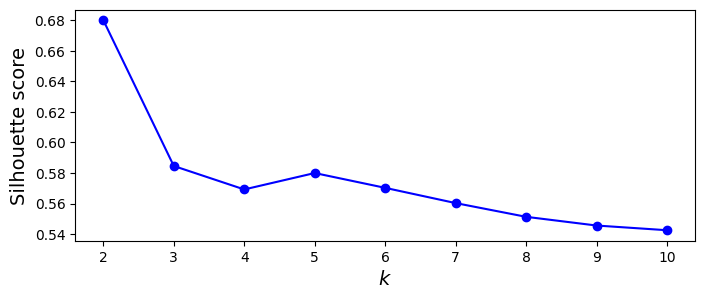

In [6]:
# Calcula los modelos y las puntuaciones de silueta para k desde 2 hasta 10
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)  # Ajusta K-Means para cada k
                for k in range(2, 11)]  # Rango modificado para k=2 a k=10

# Calcula el índice de silueta para cada modelo entrenado
silhouette_scores = [silhouette_score(X, model.labels_)  # Obtiene etiquetas de cada modelo
                     for model in kmeans_per_k]

# Configuración de la figura para la gráfica del índice de silueta
plt.figure(figsize=(8, 3))
# Grafica el índice de silueta en función del número de clusters k
plt.plot(range(2, 11), silhouette_scores, "bo-")  # Rango modificado para la gráfica
plt.xlabel("$k$", fontsize=14)  # Etiqueta del eje X
plt.ylabel("Silhouette score", fontsize=14)  # Etiqueta del eje Y
# Ajusta los ticks del eje X para mostrar valores de k desde 2 hasta 20
plt.xticks(np.arange(2, 11, 1))  # Crea ticks desde 2 hasta 20 con paso de 1
plt.show()  # Muestra la gráfica

### Visualizamos mas Detalladamente los Coeficientes de Silueta por Cluster
Este código genera gráficos individuales para cada valor de 
𝑘
k (número de clusters) mostrando la distribución de los coeficientes de silueta dentro de los clusters formados por K-Means. Para cada 
𝑘
k, se calcula el coeficiente de silueta de cada muestra, representando la calidad de pertenencia al cluster.

Los gráficos muestran los coeficientes ordenados por cluster, con colores asignados a cada uno, y una línea roja que marca el promedio del coeficiente de silueta para 
𝑘
k. Esto permite evaluar la cohesión y separación de los clusters y comparar la calidad relativa de las segmentaciones al variar 
𝑘
k. La estructura modular facilita la interpretación de las agrupaciones y ayuda a determinar el 
𝑘
k óptimo visualmente.

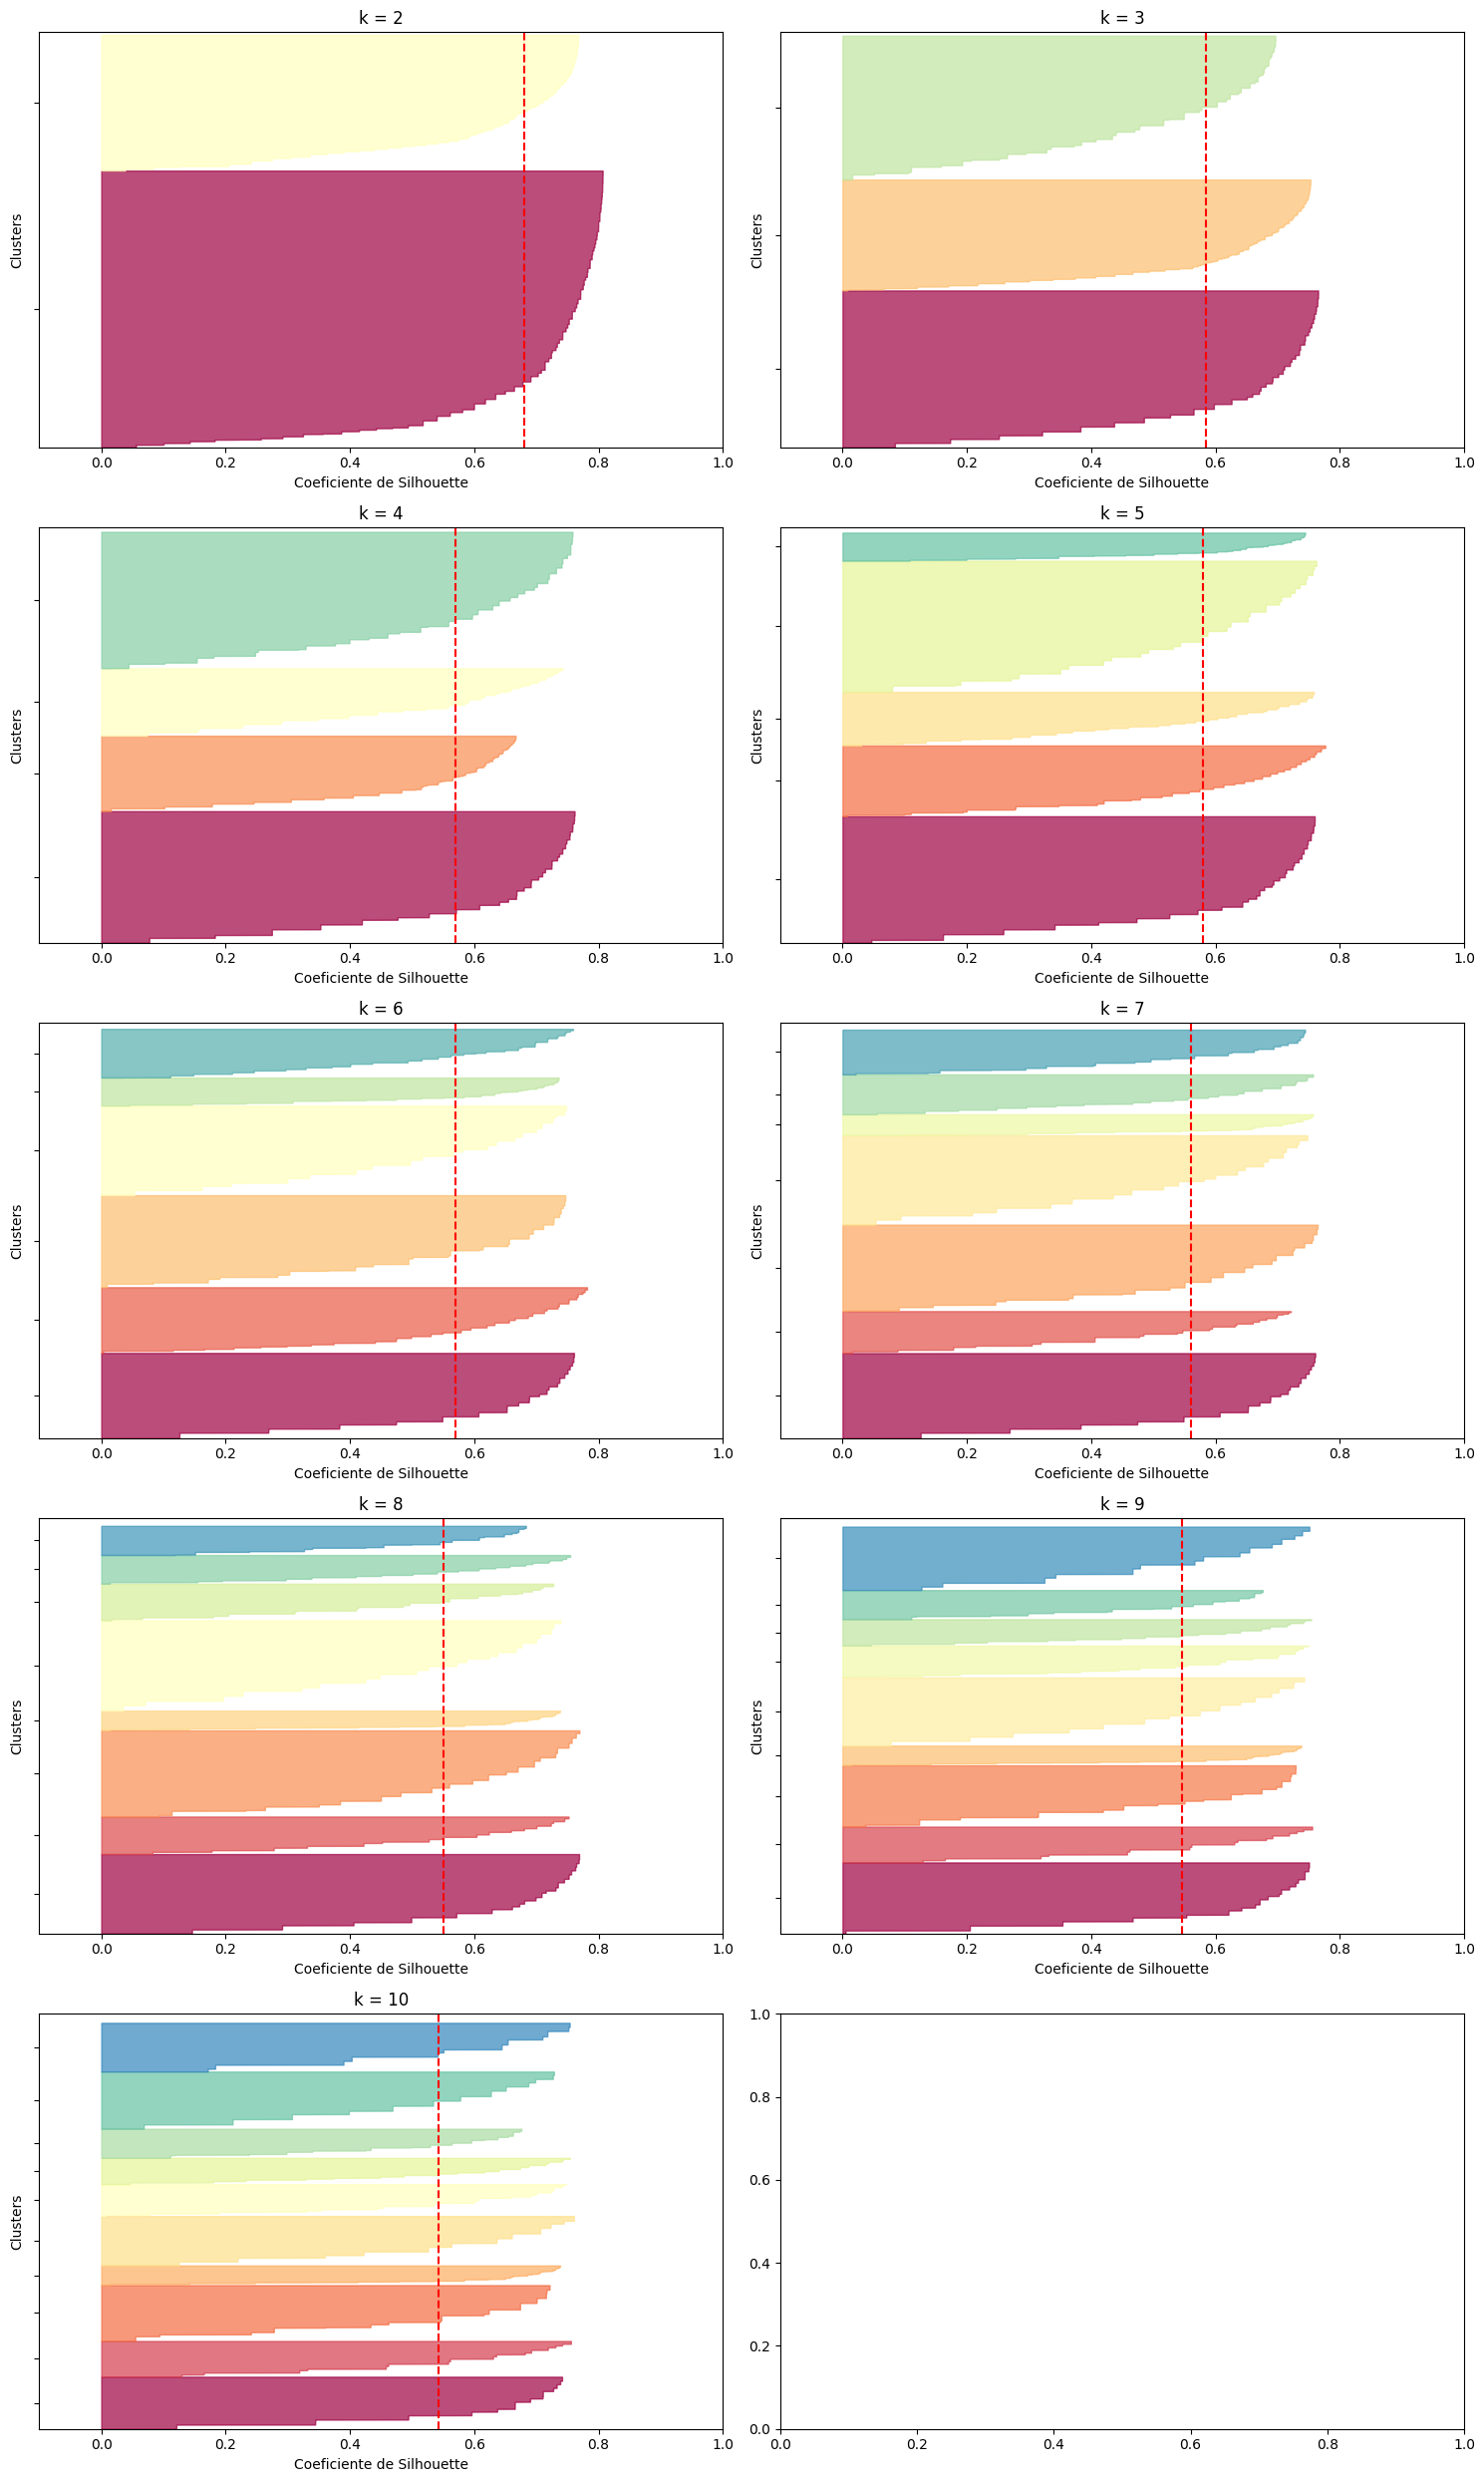

In [7]:
# Asumiendo que ya tienes kmeans_per_k y silhouette_scores calculados

# Obtener el rango de valores de k
k_values = range(2, len(kmeans_per_k) + 2)  # k empieza en 2

# Crear subplots para cada valor de k
num_plots = len(k_values)
num_rows = int(np.ceil(num_plots / 2))  # Calcula el número de filas para subplots
num_cols = 2  # Dos columnas de subplots

# Crea la figura y los subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
fig.subplots_adjust(hspace=0.4)  # Ajusta el espacio entre subplots

# Iterar sobre los valores de k y crear gráficos de silueta
for i, k in enumerate(k_values):
    ax = axes[i // num_cols, i % num_cols]  # Obtiene el subplot actual
    y_pred = kmeans_per_k[i].labels_  # Obtiene las etiquetas del modelo K-Means
    silhouette_vals = silhouette_samples(X, y_pred)  # Calcula los coeficientes de silueta

    y_ticks = []
    y_lower, y_upper = 0, 0  # Inicializa límites para los clusters
    for cluster in range(k):
        # Extrae y ordena los coeficientes de silueta para cada cluster
        cluster_silhouette_vals = silhouette_vals[y_pred == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)  # Actualiza el límite superior
        color = mpl.cm.Spectral(cluster / k)  # Asigna color basado en el cluster
        ax.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_vals,
                         facecolor=color, edgecolor=color, alpha=0.7)  # Grafica el área del cluster
        y_ticks.append((y_lower + y_upper) / 2)  # Añade tick al eje Y
        y_lower = y_upper  # Actualiza el límite inferior

    # Dibuja una línea vertical indicando el promedio del coeficiente de silueta
    ax.axvline(x=silhouette_scores[i], color="red", linestyle="--")
    ax.set_yticks(y_ticks)  # Establece los ticks en el eje Y
    ax.set_yticklabels([])  # Elimina las etiquetas del eje Y
    ax.set_xlim([-0.1, 1])  # Establece límites en el eje X
    ax.set_ylim([0, len(X) + (k + 1) * 10])  # Establece límites en el eje Y
    ax.set_title(f"k = {k}")  # Título del subplot
    ax.set_xlabel("Coeficiente de Silhouette")  # Etiqueta del eje X
    ax.set_ylabel("Clusters")  # Etiqueta del eje Y

# Ajustar el layout para una mejor visualización
plt.tight_layout()
plt.show()  # Muestra la figura


### Visualización de Clustering y Fronteras de Decisión con KMeans

Este código aplica el algoritmo K-Means a datos unidimensionales extendidos a dos dimensiones (con una segunda dimensión artificial compuesta de ceros). Luego, grafica los datos originales, los centroides de los clusters y las fronteras de decisión generadas por K-Means en un plano bidimensional.

La visualización ayuda a comprender cómo K-Means agrupa los puntos basándose en la frecuencia de atención y define regiones de pertenencia para cada cluster. La inclusión de fronteras y centroides facilita la interpretación de la segmentación y de las separaciones entre grupos.

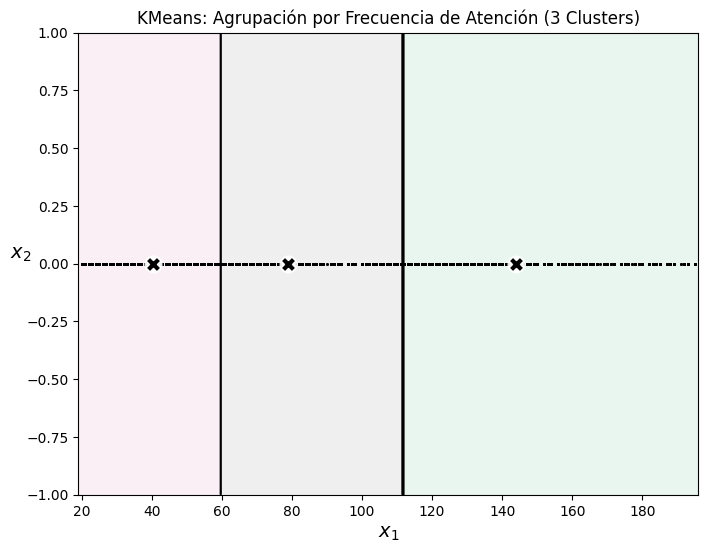

In [8]:
def plot_data(X):
    """Función para graficar los puntos de datos"""
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, circle_color='w', cross_color='k'):
    """Función para graficar los centroides"""
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=100, linewidths=3,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=3,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True):
    """Función para graficar las fronteras de decisión"""
    mins = X.min(axis=0) - 1
    maxs = X.max(axis=0) + 1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), cmap="Pastel2", alpha=0.3)
    plt.contour(xx, yy, Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), linewidths=1, colors='k')

    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

# Cargar los datos y realizar clustering KMeans con 3 clusters
# Crear una segunda dimensión artificial (en este caso, todos los puntos en una misma línea)
X_2D = np.column_stack((X, np.zeros(X.shape[0])))  # Añadir una columna de ceros

kmeans_Frecuencia_Atencion = KMeans(n_clusters=3, init="k-means++", n_init=10,
                                     algorithm="elkan", max_iter=300, random_state=42)
kmeans_Frecuencia_Atencion.fit(X_2D)

# Graficar los clusters y sus fronteras
plt.figure(figsize=(8, 6))
plot_decision_boundaries(kmeans_Frecuencia_Atencion, X_2D)
plt.title("KMeans: Agrupación por Frecuencia de Atención (3 Clusters)")
plt.show()


### Mostramos el puntaje de silueta score

In [9]:
# Mostrar el índice de silueta
print(f'Índice de Silueta: {silhouette_score(X, kmeans_Frecuencia_Atencion.labels_)}')

Índice de Silueta: 0.5832667626244568


### Sacamos los datos mas representativos por cada cluster

El código calcula las distancias de cada dato al centroide de su cluster asignado y selecciona el punto más cercano como el representante del grupo. Esto permite identificar datos característicos de cada cluster, destacando su proximidad al centro de la agrupación. Finalmente, muestra información relevante de estos puntos, como el CI del paciente y su número de visitas.

In [ ]:
# Obtener las etiquetas de los clusters para cada punto en el conjunto de datos.
labels = kmeans_Frecuencia_Atencion.labels_
# proporciona las coordenadas de los centroides de cada cluster
centroids = kmeans_Frecuencia_Atencion.cluster_centers_

# Calcular la distancia de cada punto respecto a su centroide
distances = np.linalg.norm(X - centroids[labels], axis=1)

# Añadir las distancias al dataframe original
df_visitas['Distancia_Centroide'] = distances

# Obtener los puntos más cercanos a los centroides (más representativos)
representative_points = []

for i in range(3):  # Para cada cluster
    cluster_points = df_visitas[labels == i]  # Filtra los puntos del cluster i
    # Recupera la fila correspondiente al punto más cercano.
    representative_point = cluster_points.loc[cluster_points['Distancia_Centroide'].idxmin()].copy()  # .copy() asegura que estamos trabajando con una copia
    representative_points.append(representative_point)

# Mostrar los datos más representativos de cada cluster
for i, point in enumerate(representative_points):
    print(f"Cluster {i}: CI_Paciente = {point['CI_Paciente']}, Numero_Visitas = {point['Numero_Visitas']}")


Cluster 0: CI_Paciente = 10985037.0, Numero_Visitas = 112.0
Cluster 1: CI_Paciente = 808836.0, Numero_Visitas = 20.0
Cluster 2: CI_Paciente = 323117.0, Numero_Visitas = 60.0


### Etiquetamos manualmente a los datos mas representativas

Este código clasifica los puntos más representativos de cada cluster según su número de visitas, asignándoles etiquetas como "Baja Frecuencia", "Frecuencia Media" o "Alta Frecuencia". Estas etiquetas ayudan a interpretar la relevancia de cada cluster y caracterizar el comportamiento de los pacientes dentro de cada grupo. Finalmente, muestra el CI del paciente, el número de visitas y la etiqueta asignada para cada cluster.

In [11]:
# Función para etiquetar según el número de visitas
def label_frecuencia_visitas(num_visitas):
    if num_visitas <= 50:
        return 'Baja Frecuencia'
    elif num_visitas <= 100:
        return 'Frecuencia Media'
    else:
        return 'Alta Frecuencia'

# Asignar las etiquetas manuales a los datos más representativos
for point in representative_points:
    point['Etiqueta'] = label_frecuencia_visitas(point['Numero_Visitas'])

# Mostrar los resultados con las etiquetas
for i, point in enumerate(representative_points):
    print(f"Cluster {i}: CI_Paciente = {point['CI_Paciente']}, "
          f"Numero_Visitas = {point['Numero_Visitas']}, "
          f"Etiqueta = {point['Etiqueta']}")

Cluster 0: CI_Paciente = 10985037.0, Numero_Visitas = 112.0, Etiqueta = Alta Frecuencia
Cluster 1: CI_Paciente = 808836.0, Numero_Visitas = 20.0, Etiqueta = Baja Frecuencia
Cluster 2: CI_Paciente = 323117.0, Numero_Visitas = 60.0, Etiqueta = Frecuencia Media


### Expandimos las etiquetas de los datos mas representativos a los demas de su cluster

Este código extiende la etiqueta asignada al punto representativo de un cluster al resto de los datos dentro de ese mismo cluster. Así, cada paciente en el dataset es categorizado como de "Baja Frecuencia", "Frecuencia Media", o "Alta Frecuencia" según las características generales del grupo al que pertenece. Finalmente, se muestra una vista previa de los pacientes con sus etiquetas asignadas.

In [12]:
# Expander la etiqueta del representante a todos los datos en su cluster
for i, point in enumerate(representative_points):
    # Filtrar todos los datos que pertenecen al mismo cluster
    cluster_data = df_visitas[labels == i]
    # Asignar la misma etiqueta al punto representativo a todos los datos del cluster
    df_visitas.loc[cluster_data.index, 'Etiqueta'] = point['Etiqueta']

# Mostrar los datos con sus respectivas etiquetas
print(df_visitas[['CI_Paciente', 'Numero_Visitas', 'Etiqueta']].head())


   CI_Paciente  Numero_Visitas          Etiqueta
0        20786              46   Baja Frecuencia
1        59020              29   Baja Frecuencia
2        82953             133   Alta Frecuencia
3       112967             150   Alta Frecuencia
4       124202              68  Frecuencia Media


### Dividimos los datos en 80% para entrenamiento y 20% para testeo

In [13]:
# Verificar el tamaño de df_visitas
print(f'Tamaño total de df_visitas: {df_visitas.shape[0]}')

# Dividimos los datos en 80% para entrenamiento y 20% para prueba
X_train, X_test, y_train, y_test = train_test_split(df_visitas[['CI_Paciente', 'Numero_Visitas']], df_visitas['Etiqueta'], test_size=0.2, random_state=42)

# Mostrar el total de datos de entrenamiento y prueba
print(f'Total de datos de entrenamiento: {X_train.shape[0]}')
print(f'Total de datos de prueba: {X_test.shape[0]}')


Tamaño total de df_visitas: 5000
Total de datos de entrenamiento: 4000
Total de datos de prueba: 1000


### Entrenamos el modelo y mostramos la precisión

In [14]:
# Crear el modelo de regresión logística (One-vs-All)
log_reg_ovr = OneVsRestClassifier(LogisticRegression(solver="lbfgs", max_iter=5000, random_state=42))

# Entrenar el modelo con los datos de entrenamiento
log_reg_ovr.fit(X_train, y_train)

# Realizar las predicciones en los datos de entrenamiento
y_pred = log_reg_ovr.predict(X_test)

# Evaluar la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo One-vs-Rest con regresión logística: {accuracy * 100:.2f}%")

Precisión del modelo One-vs-Rest con regresión logística: 90.80%


### Seleccionamos un dato aleatorio para comparar su etiqueta real y su prediccion

In [18]:
# Seleccionar un dato aleatorio de los datos de entrenamiento
random_index = np.random.randint(0, X_test.shape[0])  # Genera un índice aleatorio
random_data = X_test.iloc[random_index]  # Extrae los datos de entrada del índice aleatorio
real_label = y_test.iloc[random_index]  # Extrae la etiqueta real correspondiente

# Realizar la predicción para el dato aleatorio manteniendo el formato DataFrame
predicted_label = log_reg_ovr.predict(random_data.to_frame().T)  # .to_frame().T convierte el dato a DataFrame

# Mostrar el dato aleatorio con un formato claro y comprensible
print(f"\nDatos de entrada aleatorios:")
print(f"- CI del Paciente: {random_data['CI_Paciente']}")
print(f"- Número de Visitas: {random_data['Numero_Visitas']}")
print(f"\nEtiqueta real: {real_label}")
print(f"Etiqueta predicha: {predicted_label[0]}")


Datos de entrada aleatorios:
- CI del Paciente: 775560
- Número de Visitas: 56

Etiqueta real: Baja Frecuencia
Etiqueta predicha: Frecuencia Media


## 4. Aprendisaje Activo

###  Implementación de Aprendizaje Activo 

Este código aplica un enfoque de aprendizaje activo para optimizar el entrenamiento de un modelo multiclase basado en regresión logística. Los datos de entrada se escalan antes del procesamiento, y se selecciona un subconjunto inicial para entrenar el modelo. A lo largo de varias iteraciones, el modelo se ajusta progresivamente con más datos seleccionados, evaluándose en un conjunto de prueba al final para generar predicciones y probabilidades.

In [ ]:
def active_learning_cycle(X_train, y_train, X_test, y_test, n_iterations=1):
    
    # Normalización de x de entrenamiento y de prueba
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train[['Numero_Visitas']].values)
    X_test_scaled = scaler.transform(X_test[['Numero_Visitas']].values)
    
    # lista que guarda las precisiones de cada iteracción
    accuracies = []
    
    for iteration in range(n_iterations):

        # Entrenamos el modelo
        model = OneVsRestClassifier(LogisticRegression(max_iter=5000, random_state=42))
        model.fit(X_train_scaled, y_train)
        
        # Predicciones y probabilidades
        final_predictions = model.predict(X_test_scaled) # Etiquetas predichas para el conjunto de prueba.
        probas_final = model.predict_proba(X_test_scaled) # Matriz de probabilidades para cada clase y cada muestra.
        confidences = np.max(probas_final, axis=1) # se calcula la confianza y se selecciona la probabilidad más alta entre todas las clases
        
        # 10 confianzas más bajas
        print("\n10 Confianzas más bajas:")
        sorted_indices = np.argsort(confidences)[:10]
        for idx in sorted_indices:
            print(f"- CI Paciente: {X_test.iloc[idx]['CI_Paciente']}, "
                  f"Número de Visitas: {X_test.iloc[idx]['Numero_Visitas']}, "
                  f"Confianza: {confidences[idx]:.4f}, "
                  f"Etiqueta Real: {y_test.iloc[idx]}, "
                  f"Etiqueta Predicha: {final_predictions[idx]}")
        
        # Sacamos la precisión del modelo
        accuracy_final = accuracy_score(y_test, final_predictions)
        print(f"\nPrecisión final del modelo: {accuracy_final * 100:.2f}%")
        accuracies.append(accuracy_final)
        
        # Ejemplo aleatorio detallado
        random_idx = np.random.randint(0, len(X_test))
        print("\nEjemplo aleatorio:")
        print(f"- CI Paciente: {X_test.iloc[random_idx]['CI_Paciente']}")
        print(f"- Número de Visitas: {X_test.iloc[random_idx]['Numero_Visitas']}")
        print(f"Etiqueta real: {y_test.iloc[random_idx]}")
        print(f"Etiqueta predicha: {final_predictions[random_idx]}")
    
    return model, accuracies

# Llamar a la función de aprendizaje activo
model, accuracies = active_learning_cycle(X_train, y_train, X_test, y_test)


10 Confianzas más bajas:
- CI Paciente: 29318423, Número de Visitas: 108, Confianza: 0.5149, Etiqueta Real: Frecuencia Media, Etiqueta Predicha: Frecuencia Media
- CI Paciente: 59567906, Número de Visitas: 108, Confianza: 0.5149, Etiqueta Real: Frecuencia Media, Etiqueta Predicha: Frecuencia Media
- CI Paciente: 4044525, Número de Visitas: 108, Confianza: 0.5149, Etiqueta Real: Frecuencia Media, Etiqueta Predicha: Frecuencia Media
- CI Paciente: 89781397, Número de Visitas: 108, Confianza: 0.5149, Etiqueta Real: Frecuencia Media, Etiqueta Predicha: Frecuencia Media
- CI Paciente: 80802960, Número de Visitas: 108, Confianza: 0.5149, Etiqueta Real: Frecuencia Media, Etiqueta Predicha: Frecuencia Media
- CI Paciente: 91000493, Número de Visitas: 108, Confianza: 0.5149, Etiqueta Real: Frecuencia Media, Etiqueta Predicha: Frecuencia Media
- CI Paciente: 78172705, Número de Visitas: 61, Confianza: 0.5209, Etiqueta Real: Frecuencia Media, Etiqueta Predicha: Baja Frecuencia
- CI Paciente: 336